# Sesión 6 - Series de tiempo

## Análisis de la serie

In [1]:
#Importamos los paquetes
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from matplotlib import pyplot
import pmdarima as pm
from pmdarima.model_selection import train_test_split
from math import sqrt
from sklearn.metrics import mean_squared_error

In [2]:
#Abrimos la base de datos
datos = pd.read_csv('C:\\Users\\Bryan\\OneDrive\\Documents\\Trabajo\\UPB\\Postgrado\\Analisis empresarial de datos\\Base de datos\\AirPassengers.csv',
                   names = ['mes', 'n_pasajeros'], header = 0)

#Analizamos los datos
print(datos.head())

       mes  n_pasajeros
0  1949-01          112
1  1949-02          118
2  1949-03          132
3  1949-04          129
4  1949-05          121


In [3]:
#Observemos el tipo de variables
datos.dtypes

mes            object
n_pasajeros     int64
dtype: object

In [4]:
#Lo recodificamos como variable de tiempo
datos['mes'] = pd.to_datetime(datos['mes'], format='%Y-%m')

#Observamos los datos
print(datos.head())

         mes  n_pasajeros
0 1949-01-01          112
1 1949-02-01          118
2 1949-03-01          132
3 1949-04-01          129
4 1949-05-01          121


In [5]:
#Observemos el nuevo tipo de variables
datos.dtypes

mes            datetime64[ns]
n_pasajeros             int64
dtype: object

In [6]:
#Transformemos el valor de la fecha en el index
datos.index = datos['mes']
del datos['mes']
print(datos.head())

            n_pasajeros
mes                    
1949-01-01          112
1949-02-01          118
1949-03-01          132
1949-04-01          129
1949-05-01          121


D:\Python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Número de pasajeros')

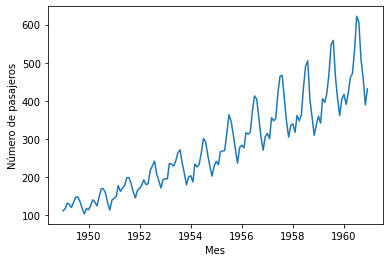

In [7]:
#Grafiquemos
sns.lineplot(datos.index, datos.n_pasajeros)

#Pongamos nombres a los ejes
plt.xlabel("Mes")
plt.ylabel("Número de pasajeros")

In [8]:
#Analizamos si los datos siguen un proceso estacionario
adft = adfuller(datos,autolag="AIC")

#Visualizamos el resultado
resultado_adft = pd.DataFrame({"Values":[adft[0],adft[1],adft[2],adft[3],
                                    adft[4]['1%'], adft[4]['5%'], adft[4]['10%']]  ,
                          "Metric":["Test Statistics","p-value","No. of lags used","Number of observations used", 
                                                        "critical value (1%)", "critical value (5%)", "critical value (10%)"]})
print(resultado_adft)

       Values                       Metric
0    0.815369              Test Statistics
1    0.991880                      p-value
2   13.000000             No. of lags used
3  130.000000  Number of observations used
4   -3.481682          critical value (1%)
5   -2.884042          critical value (5%)
6   -2.578770         critical value (10%)


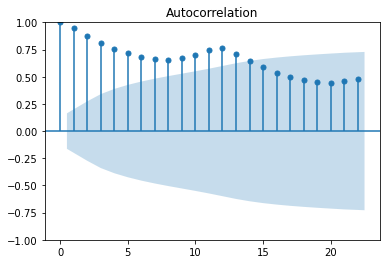

In [9]:
#Graficamos el ACF de la serie de tiempo
plot_acf(datos)
plt.show()

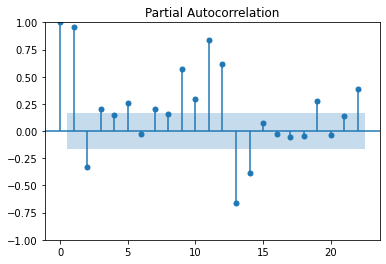

In [10]:
#Graficamos el PACF de la serie de tiempo
plot_pacf(datos, method='ols')
plt.show()

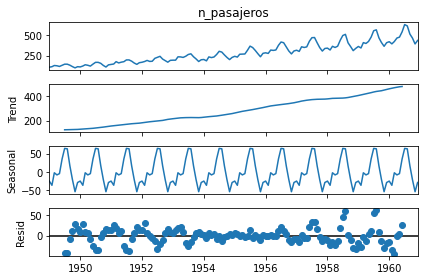

In [11]:
#Descomponemos la serie de tiempo
decompose = seasonal_decompose(datos['n_pasajeros'],model='additive')
decompose.plot()
plt.show()

## Implementación de un modelo SARIMA 

### Modelo MA(1) 

In [12]:
#Implementamos el modelo como tal
modelo = ARIMA(datos, order=(0,0,1))
modelo_fit = modelo.fit()
#Resumen del modelo
print(modelo_fit.summary())

D:\Python\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
D:\Python\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
D:\Python\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
D:\Python\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:            n_pasajeros   No. Observations:                  144
Model:                 ARIMA(0, 0, 1)   Log Likelihood                -806.431
Date:                Fri, 25 Aug 2023   AIC                           1618.863
Time:                        18:42:42   BIC                           1627.772
Sample:                    01-01-1949   HQIC                          1622.483
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        280.6497     11.649     24.092      0.000     257.818     303.481
ma.L1          0.9642      0.030     32.218      0.000       0.906       1.023
sigma2      4205.2326    586.726      7.167      0.0

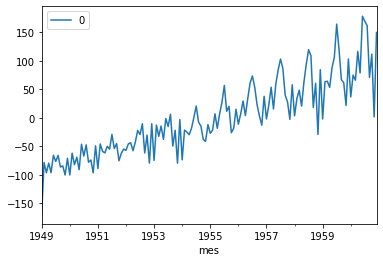

In [13]:
#Gráfico de residuos
residuals = pd.DataFrame(modelo_fit.resid)
residuals.plot()
pyplot.show()

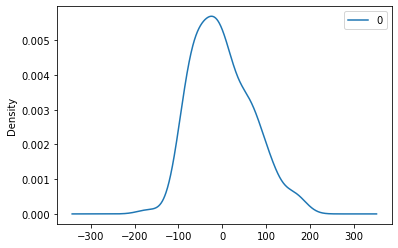

In [14]:
#Densidad del gráfico
residuals.plot(kind='kde')
pyplot.show()

In [15]:
#Resumen de los residuos
print(residuals.describe())

                0
count  144.000000
mean    -0.436727
std     66.429025
min   -168.649723
25%    -50.921336
50%    -10.825076
75%     49.768568
max    178.336650


### Modelo AR(1) 

In [16]:
#Implementamos el modelo como tal
modelo = ARIMA(datos, order=(1,0,0))
modelo_fit = modelo.fit()
#Resumen del modelo
print(modelo_fit.summary())

                               SARIMAX Results                                
Dep. Variable:            n_pasajeros   No. Observations:                  144
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -711.090
Date:                Fri, 25 Aug 2023   AIC                           1428.181
Time:                        18:42:42   BIC                           1437.090
Sample:                    01-01-1949   HQIC                          1431.801
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        280.2943     66.403      4.221      0.000     150.146     410.442
ar.L1          0.9645      0.019     51.535      0.000       0.928       1.001
sigma2      1118.5409    122.133      9.158      0.0

D:\Python\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
D:\Python\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
D:\Python\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


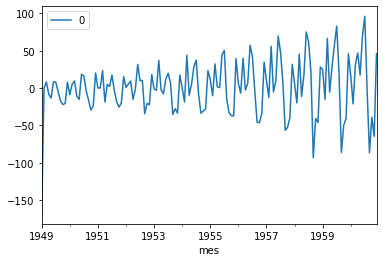

In [17]:
#Gráfico de residuos
residuals = pd.DataFrame(modelo_fit.resid)
residuals.plot()
pyplot.show()

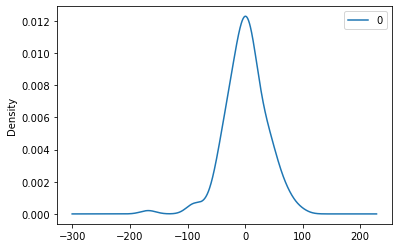

In [18]:
#Densidad del gráfico
residuals.plot(kind='kde')
pyplot.show()

In [19]:
#Resumen de los residuos
print(residuals.describe())

                0
count  144.000000
mean     1.016314
std     36.189738
min   -168.294340
25%    -18.999396
50%      0.401609
75%     20.201106
max     96.029687


### Modelo ARMA(1, 1) 

In [20]:
#Implementamos el modelo como tal
modelo = ARIMA(datos, order=(1,0,1))
modelo_fit = modelo.fit()
#Resumen del modelo
print(modelo_fit.summary())

                               SARIMAX Results                                
Dep. Variable:            n_pasajeros   No. Observations:                  144
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -700.874
Date:                Fri, 25 Aug 2023   AIC                           1409.749
Time:                        18:42:43   BIC                           1421.628
Sample:                    01-01-1949   HQIC                          1414.576
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        280.3009     56.644      4.948      0.000     169.281     391.321
ar.L1          0.9373      0.028     34.009      0.000       0.883       0.991
ma.L1          0.4264      0.076      5.642      0.0

D:\Python\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
D:\Python\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
D:\Python\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


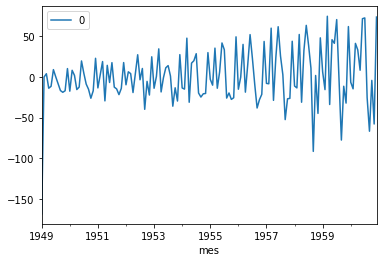

In [21]:
#Gráfico de residuos
residuals = pd.DataFrame(modelo_fit.resid)
residuals.plot()
pyplot.show()

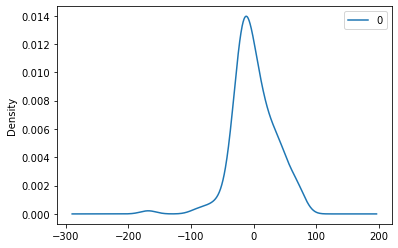

In [22]:
#Densidad del gráfico
residuals.plot(kind='kde')
pyplot.show()

In [23]:
#Resumen de los residuos
print(residuals.describe())

                0
count  144.000000
mean     0.516908
std     34.073276
min   -168.300947
25%    -18.524390
50%     -3.895720
75%     20.589505
max     74.519895


### Modelo ARIMA(1, 1, 1) 

In [24]:
#Implementamos el modelo como tal
modelo = ARIMA(datos, order=(1, 1, 1))
modelo_fit = modelo.fit()
#Resumen del modelo
print(modelo_fit.summary())

                               SARIMAX Results                                
Dep. Variable:            n_pasajeros   No. Observations:                  144
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -694.341
Date:                Fri, 25 Aug 2023   AIC                           1394.683
Time:                        18:42:43   BIC                           1403.571
Sample:                    01-01-1949   HQIC                          1398.294
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4742      0.123     -3.847      0.000      -0.716      -0.233
ma.L1          0.8635      0.078     11.051      0.000       0.710       1.017
sigma2       961.9270    107.433      8.954      0.0

D:\Python\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
D:\Python\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
D:\Python\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


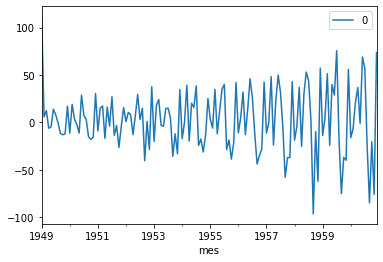

In [25]:
#Gráfico de residuos
residuals = pd.DataFrame(modelo_fit.resid)
residuals.plot()
pyplot.show()

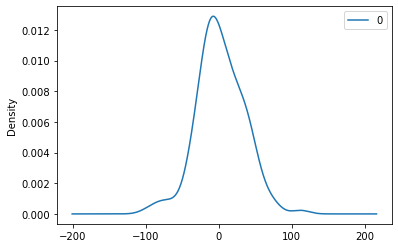

In [26]:
#Densidad del gráfico
residuals.plot(kind='kde')
pyplot.show()

In [27]:
#Resumen de los residuos
print(residuals.describe())

                0
count  144.000000
mean     2.705411
std     32.293238
min    -96.360708
25%    -16.812276
50%      0.056039
75%     24.475020
max    112.000000


## Modelo automático 

In [28]:
#Creamos el modelo
modelo = pm.auto_arima(datos, seasonal=True, m=12)

#Vemos el resumen del mismo
print(modelo.summary())

                                      SARIMAX Results                                      
Dep. Variable:                                   y   No. Observations:                  144
Model:             SARIMAX(2, 1, 1)x(0, 1, [], 12)   Log Likelihood                -504.923
Date:                             Fri, 25 Aug 2023   AIC                           1017.847
Time:                                     18:42:49   BIC                           1029.348
Sample:                                 01-01-1949   HQIC                          1022.520
                                      - 12-01-1960                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5960      0.085      6.987      0.000       0.429       0.763
ar.L2          0.2143      

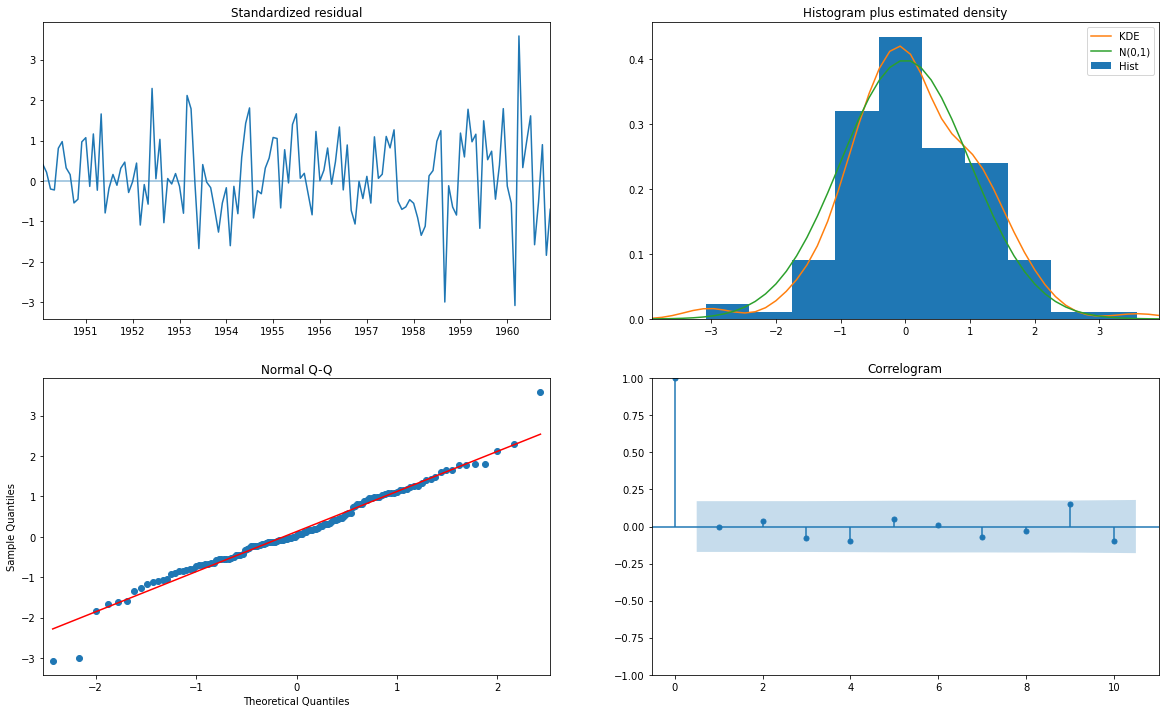

In [29]:
#Gráfico diagnóstico
modelo.plot_diagnostics(figsize = (20, 12))
plt.show()

## Evaluación del modelo 

C:\Users\Bryan\AppData\Local\Temp/ipykernel_13072/3785938886.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['train'] = train['n_pasajeros']
C:\Users\Bryan\AppData\Local\Temp/ipykernel_13072/3785938886.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['test'] = test['n_pasajeros']


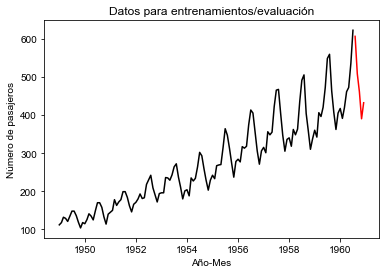

In [30]:
#Se incluye de nuevo la variable temporal
datos['Fecha'] = datos.index

#Se eliminan los últimos valores para poder realizar una evaluación
train = datos[datos['Fecha'] < pd.to_datetime("1960-08", format='%Y-%m')]

#Se reajustan los nombres
train['train'] = train['n_pasajeros']

#Se eliminan las variables no necesarias
del train['Fecha']
del train['n_pasajeros']

#Se establece un grupo de prueba
test = datos[datos['Fecha'] >= pd.to_datetime("1960-08", format='%Y-%m')]

#Se reajustan los nombres
test['test'] = test['n_pasajeros']

#Se eliminen las variables no necesarias
del test['Fecha']
del test['n_pasajeros']

#Se grafica la diferencia para la evaluación
plt.plot(train, color = "black")
plt.plot(test, color = "red")
plt.title("Datos para entrenamientos/evaluación")
plt.ylabel("Número de pasajeros")
plt.xlabel('Año-Mes')
sns.set()
plt.show()

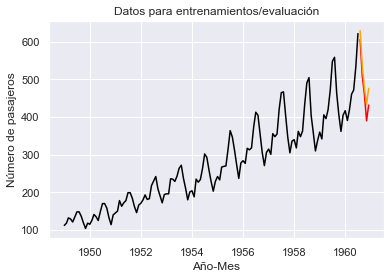

In [31]:
#Se entrena un modelo solo con la parte de entrenamiento
modelo = pm.auto_arima(train, seasonal=True, m=12)

#Se ajusta el modelo
modelo.fit(train)

#Se pronóstica
forecast = modelo.predict(n_periods=len(test))
forecast = pd.DataFrame(forecast,index = test.index,columns=['Prediccion'])

#Se grafica la diferencia para la evaluación
plt.plot(train, color = "black")
plt.plot(test, color = "red")
plt.plot(forecast, color = "orange")
plt.title("Datos para entrenamientos/evaluación")
plt.ylabel("Número de pasajeros")
plt.xlabel('Año-Mes')
plt.show()

In [32]:
#Evaluación de ajuste
rms = sqrt(mean_squared_error(test,forecast))
print("RMSE: ", rms)

RMSE:  32.936620068112845


## Pronóstico más largo

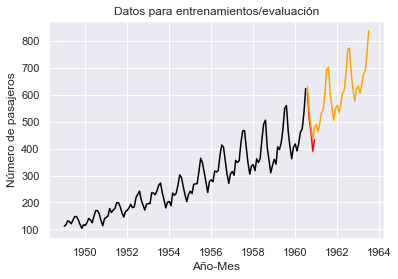

In [33]:
#Se entrena un modelo solo con la parte de entrenamiento
modelo = pm.auto_arima(train, seasonal=True, m=12)

#Se ajusta el modelo
modelo.fit(train)

#Se pronóstica
forecast_1 = modelo.predict(n_periods=36)
forecast_1 = pd.DataFrame(forecast_1, columns = ['Prediccion'])

#Se grafica la diferencia para la evaluación
plt.plot(train, color = "black")
plt.plot(test, color = "red")
plt.plot(forecast_1, color = "orange")
plt.title("Datos para entrenamientos/evaluación")
plt.ylabel("Número de pasajeros")
plt.xlabel('Año-Mes')
plt.show()
